<a href="https://colab.research.google.com/github/edsonportosilva/ElectricCircuits/blob/master/Jupyter%20notebooks/Circuitos%20El%C3%A9tricos%20I%20-%20Semana%202.2%20-%20Circuitos%20divisores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.core.display import HTML
from IPython.display import Image
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

if 'google.colab' in str(get_ipython()):    
    ! git clone -b master https://github.com/edsonportosilva/ElectricCircuits
    from os import chdir as cd
    cd('/content/ElectricCircuits/')
    ! pip install -e .

Cloning into 'ElectricCircuits'...
remote: Enumerating objects: 1156, done.
remote: Counting objects: 100% (143/143), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 1156 (delta 73), reused 125 (delta 67), pack-reused 1013
Receiving objects: 100% (1156/1156), 177.49 MiB | 25.02 MiB/s, done.
Resolving deltas: 100% (658/658), done.
Checking out files: 100% (320/320), done.


# *Circuitos Elétricos I*

## Semana 2 - Circuitos divisores

### Carregamento de um circuito de alimentação

Quando uma fonte de tensão fornece energia a um dado elemento de circuito, diz-se que a fonte encontra-se *carregada*, ou que o elemento conectado à fonte é uma *carga* que está sendo alimentada pela fonte. De maneira geral, o carregamento de um circuito é o processo de introdução de elementos que extrairão corrente do circuito. Quanto maior for a  magnitude da corrente drenada, maior será o efeito de carregamento.

<img src="https://github.com/edsonportosilva/ElectricCircuits/blob/master/Jupyter%20notebooks/figures/J3C0.png?raw=1" width="300">

Da relação do divisor de tensão, temos que:

$$ \begin{align} v_x &= \frac{R_x}{R_{eq}}v_s = \frac{R_x}{R_x+R_y}v_s\\
                 v_y &= \frac{R_y}{R_{eq}}v_s = \frac{R_y}{R_x+R_y}v_s
    \end{align}$$
    
Ao conectar uma carga $R_L$ ao resistor $R_y$, temos que a tensão $v_y$ será dada por:

$$\begin{align} v_y &= \frac{(R_y||R_L)}{R_{eq}}v_s = \frac{(R_y||R_L)}{R_x+(R_y||R_L)}v_s\\ \\
                v_y &= \frac{\frac{R_yR_L}{R_y+R_L}}{R_x+\frac{R_yR_L}{R_y+R_L}}v_s = \frac{R_yR_L}{R_x(R_y+R_L)+R_yR_L}v_s = \frac{R_y}{R_x(\frac{R_y}{R_L}+1)+R_y}v_s
\end{align}$$


Note que, se $R_L \gg R_y$, a tensão $v_y$ com a carga conectada aproxima-se da tensão obtida com os terminais em aberto.

### Visualizando o comportamento do circuito alimentador em função da carga conectada

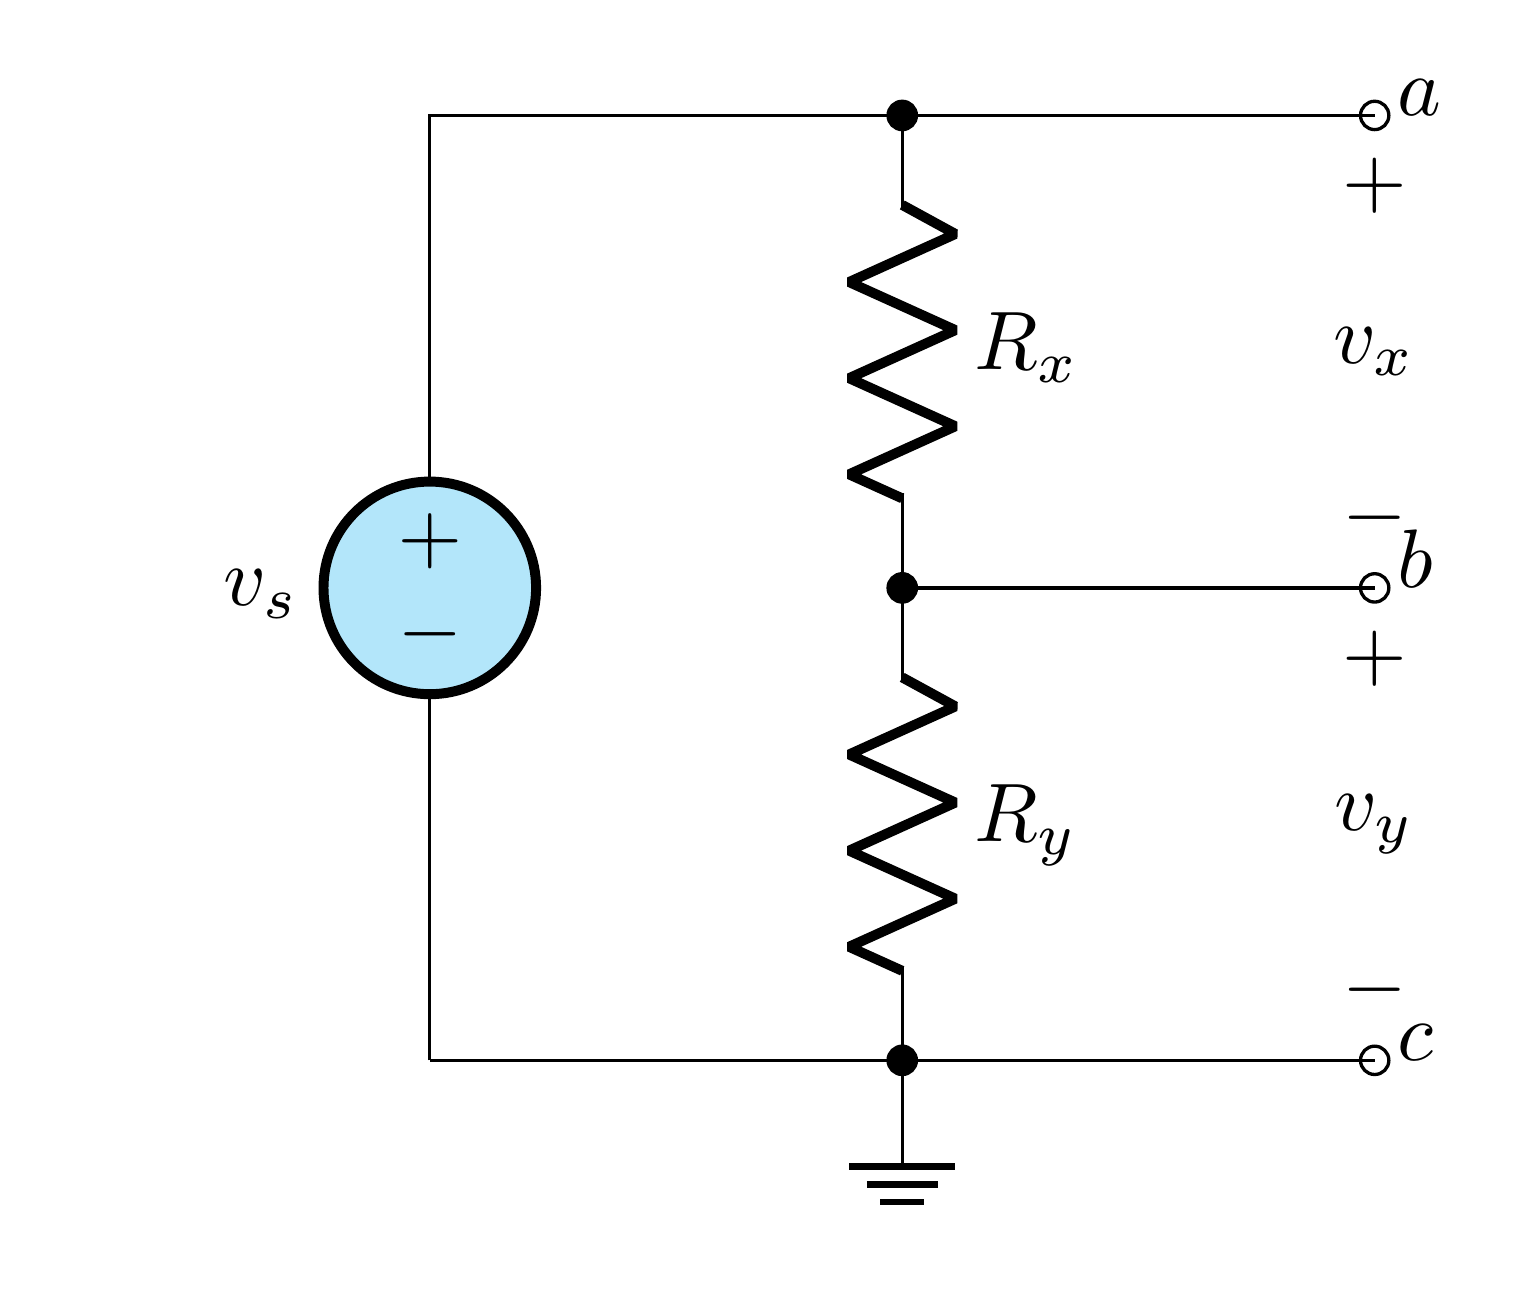

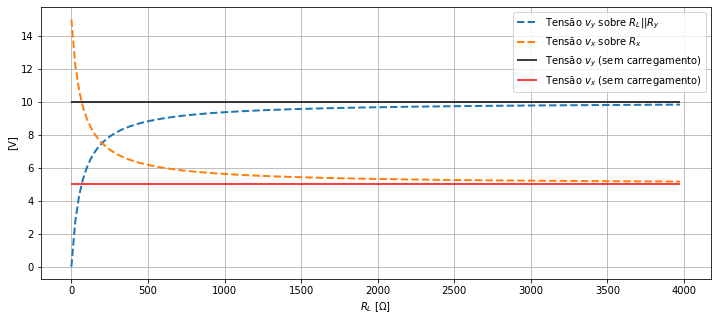

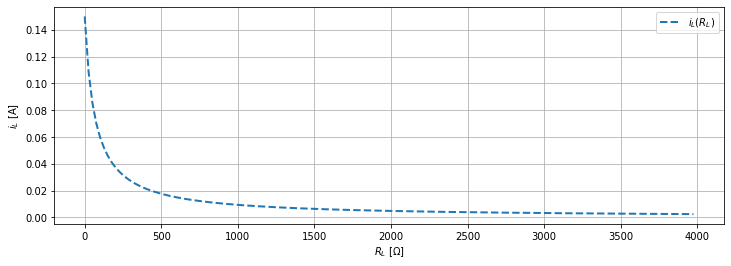

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# parâmetros do circuito
Vs = 15
Rx = 100
Ry = 200

# cálculo das tensões com o divisor de tensão carregado
# com uma carga RL
R = np.arange(0,4000,25)
Vy = np.zeros(R.shape)
Vx = np.zeros(R.shape)
iL = np.zeros(R.shape)

for k, RL in enumerate(R):
    if RL == 0:
        Vy[k] = 0
        iL[k] = Vs/Rx
    else:
        Vy[k] = ( Ry/( Rx * (Ry/RL + 1) + Ry ) )*Vs
        iL[k] = Vy[k]/RL
        
    Vx[k] = Vs-Vy[k]

plt.figure(figsize=(12,5))
plt.plot(R, Vy,'--', label='Tensão $v_y$ sobre $R_L$||$R_y$', linewidth=2)
plt.plot(R, Vx,'--' , label='Tensão $v_x$ sobre $R_x$', linewidth=2)
plt.hlines((Ry/(Rx+Ry))*Vs, R.min(0),R.max(0),'k', label = 'Tensão $v_y$ (sem carregamento)')
plt.hlines((Rx/(Rx+Ry))*Vs, R.min(0),R.max(0),'r', label = 'Tensão $v_x$ (sem carregamento)')

plt.legend()
plt.xlabel('$R_L$ [Ω]')
plt.ylabel('[V]')
plt.grid()

plt.figure(figsize=(12,4))
plt.plot(R, iL,'--', label='$i_L(R_L)$', linewidth=2)

plt.legend()
plt.xlabel('$R_L$ [Ω]')
plt.ylabel('$i_L$ [A]')
plt.grid();

Image("figures/J3C0.png", width=300)

**Pergunta**: como os gráficos acima podem ser utilizados para explicar os riscos de conectar diversos equipamentos elétricos numa mesma tomada?

## Exercícios

### Exercício 1: 

a. No circuito abaixo, $V_s=$120 V, determine o valor das tensões nos terminais $a$, $b$ e $c$ indicados, com relação ao potencial de referência.

b. Determine o valor das tensões nos terminais indicados considerando que cada um deles alimenta uma carga de 20 $\Omega$.

<img src="https://github.com/edsonportosilva/ElectricCircuits/blob/master/Jupyter%20notebooks/figures/J3C1.png?raw=1" width="400">

### Exercício 2: 

Determine o valor de $R_1$, $R_2$ e $R_3$ no circuito divisor de tensão ilustrado na figura seguinte. O circuito pode ser projetado utilizando resistores de 2 W?

<img src="https://github.com/edsonportosilva/ElectricCircuits/blob/master/Jupyter%20notebooks/figures/J3C2.png?raw=1" width="600">